In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Dish.csv') # renamed from the csv file within train.csv.zip on Kaggle

df.info(verbose=True)

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423397 entries, 0 to 423396
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              423397 non-null  int64  
 1   name            423397 non-null  object 
 2   description     0 non-null       float64
 3   menus_appeared  423397 non-null  int64  
 4   times_appeared  423397 non-null  int64  
 5   first_appeared  423397 non-null  int64  
 6   last_appeared   423397 non-null  int64  
 7   lowest_price    394297 non-null  float64
 8   highest_price   394297 non-null  float64
dtypes: float64(3), int64(5), object(1)
memory usage: 29.1+ MB


,id,name,description,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price
0,1,Consomme printaniere royal,NaN,8,8,1897,1927,0.20,0.4
1,2,Chicken gumbo,NaN,111,117,1895,1960,0.10,0.8
2,3,Tomato aux croutons,NaN,13,13,1893,1917,0.25,0.4
3,4,Onion au gratin,NaN,41,41,1900,1971,0.25,1.0
4,5,St. Emilion,NaN,66,68,1881,1981,0.00,18.0


In [3]:
numeric_cols = df.select_dtypes(include=['number']).columns
print(numeric_cols)

non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

Index(['id', 'description', 'menus_appeared', 'times_appeared',
       'first_appeared', 'last_appeared', 'lowest_price', 'highest_price'],
      dtype='object')
Index(['name'], dtype='object')


In [4]:
df[non_numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423397 entries, 0 to 423396
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   name    423397 non-null  object
dtypes: object(1)
memory usage: 3.2+ MB


In [6]:
num_missing = df.isna().sum()
num_missing[:10]

id                     0
name                   0
description       423397
menus_appeared         0
times_appeared         0
first_appeared         0
last_appeared          0
lowest_price       29100
highest_price      29100
dtype: int64

In [7]:
pct_missing = df.isna().mean()
pct_missing[:10]

id                0.00000
name              0.00000
description       1.00000
menus_appeared    0.00000
times_appeared    0.00000
first_appeared    0.00000
last_appeared     0.00000
lowest_price      0.06873
highest_price     0.06873
dtype: float64

<AxesSubplot:>

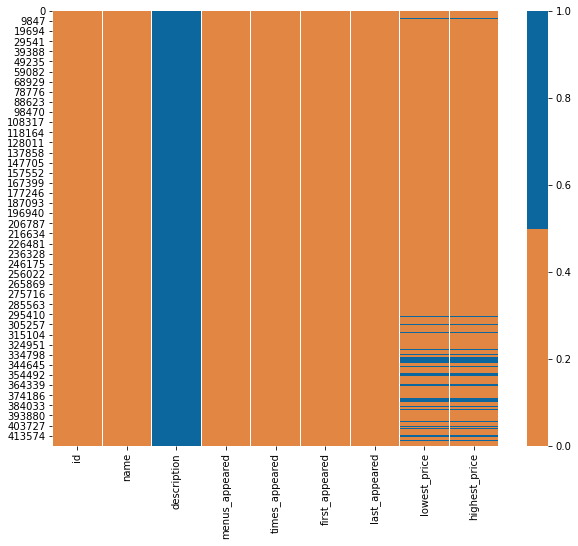

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

cols = df.columns[:30]
colours = ['#e28743', '#0c679e'] # specify colours: yellow - missing. blue - not missing
sns.heatmap(df[cols].isna(), cmap=sns.color_palette(colours))